Experiment 22 - SVD Analysis 

In [17]:
import sys
sys.path.insert(0, '../../')
import numpy as np
from gasp import ssfp, responses, simulation, dataset, get_project_path, gasp as GASP
import matplotlib.pyplot as plt

In [18]:
def train(alpha, bw, shift, method="linear"):
    width = 256
    height = 1
    npcs = 16
    TRs = [5e-3, 10e-3, 20e-3]
    alpha = np.deg2rad(alpha)
    gradient = 2 * np.pi
    phantom_type = 'line'
    phantom_padding = 32

    D = responses.gaussian(width, bw=bw, shift=shift)
    M = simulation.simulate_ssfp(width=width, height=height, npcs=npcs, TRs=TRs, alpha=alpha, gradient=gradient, phantom_type=phantom_type, phantom_padding=phantom_padding)
    Ic, An = simulation.train_gasp(M, D, clines=2, method=method)
    An = np.array(An)[0]
    return Ic, An, M

In [33]:
def train_and_plot(alpha = 20, bw = 0.2, shift = 0, method='linear'):
    Ic, An, Mtrain = train(alpha=alpha, bw=bw, shift=shift, method=method)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,2))

    _ = np.sqrt(np.sum(np.abs(Mtrain)**2, axis=2))
    _ = abs(_[:,:,0,0])
    print(_.shape)
    ax1.plot(_.T)

    _ = np.abs(Ic)
    print(_.shape)
    ax2.plot(_.T)

    return An

In [41]:
def create_gasp_data(alpha = 20):
        width = 256
        height = 1
        npcs = 16
        TRs = [5e-3, 10e-3, 20e-3]
        alpha = np.deg2rad(alpha)
        gradient = 2 * np.pi
        phantom_type = 'line'
        phantom_padding = 32
        
        M = simulation.simulate_ssfp(width=width, height=height, npcs=npcs, TRs=TRs, alpha=alpha, gradient=gradient, phantom_type=phantom_type, phantom_padding=phantom_padding)
        return M
        
def run_gasp(Mdata, An, method="linear"):
    Ic = []
    for cc in range(Mdata.shape[2]):
        Mc = Mdata[:,:,cc,:,:]
        Mc = np.reshape(Mc,(Mc.shape[0], Mc.shape[1], -1))
        _ = GASP.apply_gasp(Mc, An, method=method)
        Ic.append(_)
    Ic = np.array(Ic)
    Ic = np.sqrt(np.sum(np.abs(Ic)**2, axis=0))
    return Ic

def plot_gasp(Ic):
    pass

(1, 256)
(1, 256)
(1, 256, 16, 3)
(1, 256, 48)


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.01614654e-04, 2.75505915e-05, 2.21093174e-04, 2.89352353e-04,
        2.15130304e-04, 4.85744886e-05, 9.42570489e-05, 1.58607680e-04,
        2.30209434e-04, 2.06274826e-04, 1.45035640e-04, 8.24396005e-05,
        8.05380820e-05, 3.35570784e-05, 2.41485934e-04, 2.22742815e-05,
        2.91681322e-04, 6.11911268e-04, 4.02337629e-04, 5.41737272e-05,
        4.12455354e-04, 5.22549174e-04, 4.08944574e-04, 2.042751

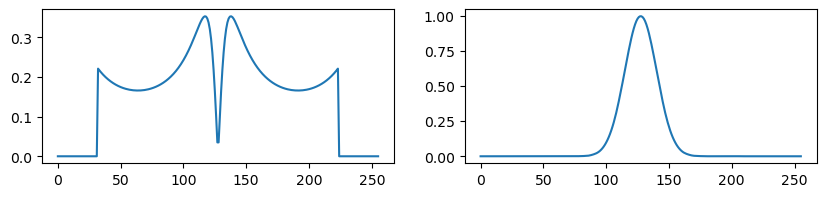

In [42]:
An = train_and_plot()
M = create_gasp_data()
Ic = run_gasp(M, An, 'linear')
